In [1]:
import time
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

In [2]:
def DP_MEP(start,end,tot_prize,paths,prizes,memo):
    
    filtered=[]
    filter_len=[]
    for i in range(len(paths)):
        if (paths[i][0]==start and paths[i][-1] == end and memo[(paths[i],paths[i][-1])][2] >=tot_prize):
            filtered += [tuple(paths[i])]
    for j in range(len(filtered)):
            filter_len += [memo[(filtered[j], filtered[j][-1])][0]]
            
    
            
            
    #if filtered==[]:
        #print("No such path") 
       # optimal_cost= 100000000
        #optimal_path=[]
    #else:
        
    #print(filtered)
   # print(filter_len)
    optimal_path=[]
    optimal_cost=1000000000
    prize_gathered=0
    if ((filter_len) !=[]): 
        #print("AA")
        #print(filter_len)
        optimal_cost = min(filter_len)
        optimal_path = filtered[filter_len.index(min(filter_len))]
        prize_gathered = memo[(optimal_path, optimal_path[-1])][2]
    
    
    return optimal_path, optimal_cost

In [3]:
def DP_MPP(distances_array,prize_array,dist_bound):
    n = len(distances_array)
    all_points_set = set(range(n))
    prize_array1=prize_array
    # memo keys: tuple(sorted_points_in_path, last_point_in_path)
    # memo values: tuple(cost_thus_far, prize thus far)
    memo = {(tuple([i]), i): tuple([0, None,i]) for i in range(n)}
    queue = [(tuple([i]), i) for i in range(n)]
    paths = [tuple([i]) for i in range(n)]
    prizes= prize_array
    s=0

    while queue:
        prev_visited, prev_last_point = queue.pop(0)
        prev_dist, _ ,prev_prize= memo[(prev_visited, prev_last_point)]
        paths += [(prev_visited)]
        prizes += [prev_prize]

        to_visit = all_points_set.difference(set(prev_visited))
        for new_last_point in to_visit:
            new_visited = tuple((list(prev_visited) + [new_last_point]))
            new_dist = prev_dist + distances_array[prev_last_point][new_last_point]
            new_prize = prev_prize + prize_array[new_last_point]

            if (new_visited, new_last_point) not in memo:
                memo[(new_visited, new_last_point)] = (new_dist, prev_last_point,new_prize)
                queue += [(new_visited, new_last_point)]
    
    
      
    #print(max(prizes))
    
    possible_paths=[]
    possible_costs=[]
    prizes.sort()
    
    while len(prizes) !=0:
        j=1
        while(j<n and len(prizes) !=0):
            
            optimal_path, optimal_cost =DP_MEP(s,j,max(prizes),paths,prizes,memo)
            #print(max(prizes),optimal_path,optimal_cost)
     
            prizes.remove(max(prizes))
       
            if len(optimal_path) != 0 :
                paths.remove(optimal_path)
        
            if(optimal_cost <= dist_bound and optimal_cost!= 1000000000):
                
                possible_paths +=optimal_path
                possible_costs += optimal_cost
                return optimal_path, optimal_cost
          
            j+=1
    if len(prizes) ==0:
        print("No such path")
        optimal_path =[]
        optimal_cost =0
            
    
    return optimal_path, optimal_cost
    

In [4]:
def plot_route(X, optimal_path):
    for p1, p2 in zip(optimal_path[:-1], optimal_path[1:]):
        plt.plot([X[p1, 0], X[p2, 0]], [X[p1, 1], X[p2, 1]]);

In [5]:
def generate_random_input(n_points):
    X = np.array([[1,19],[0,0],[1,2],[0.5,7],[7,5],[10,10]])
    distances_array = np.array([[np.linalg.norm(X[i] - X[j])
                                 for i in range(n_points)]
                                for j in range(n_points)])
    prize_array = [0.7,4,0.2,4,10.5,1]
    print(distances_array)
    #prize_array = list(np.floor(10*np.random.rand(6)))
    return X, distances_array, prize_array

In [6]:
input_size = 6
X, distances_array, prize_array = generate_random_input(input_size)
#tot_prize=27
dist_bound= 27
prize_array1 = prize_array.copy()



t = time.time()
optimal_path, optimal_cost= DP_MPP(distances_array,prize_array,dist_bound)
runtime = round(time.time() - t, 3)

index=0; prize_gathered = 0
while (index < len(optimal_path)):
        prize_gathered += prize_array1[optimal_path[index]]
        print(optimal_path[index],prize_array1[optimal_path[index]],prize_gathered)
        index +=1


print(f"Found optimal path in {runtime} seconds.") 
print(f"Optimal cost: {round(optimal_cost, 3)}, optimal path: {optimal_path}")
print(f"Prize collected :{prize_gathered}")


[[ 0.         19.02629759 17.         12.01041215 15.23154621 12.72792206]
 [19.02629759  0.          2.23606798  7.01783442  8.60232527 14.14213562]
 [17.          2.23606798  0.          5.02493781  6.70820393 12.04159458]
 [12.01041215  7.01783442  5.02493781  0.          6.80073525  9.96242942]
 [15.23154621  8.60232527  6.70820393  6.80073525  0.          5.83095189]
 [12.72792206 14.14213562 12.04159458  9.96242942  5.83095189  0.        ]]
0 0.7 0.7
3 4 4.7
4 10.5 15.2
5 1 16.2
Found optimal path in 0.418 seconds.
Optimal cost: 24.642, optimal path: (0, 3, 4, 5)
Prize collected :16.2


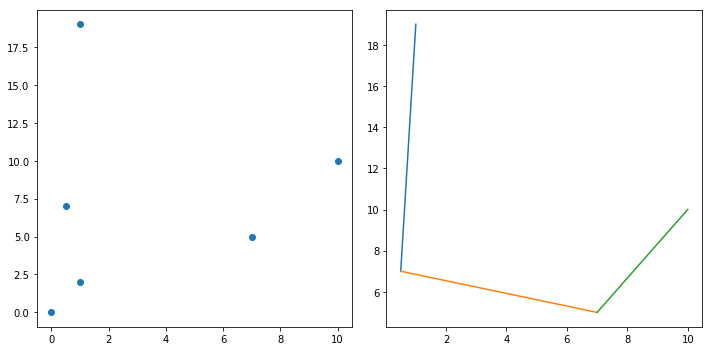

In [7]:
plt.figure(figsize=(10, 5));

plt.subplot(1, 2, 1);
plt.scatter(X[:, 0], X[:, 1]);

plt.subplot(1, 2, 2);
plot_route(X, optimal_path)

plt.tight_layout();